# Исследование объявлений о продаже квартир

В вашем распоряжении данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
_________________

##### 1. Открытие файла с данными и изучение общей информации
* [1. Изученеие файлов с данными, получение общей информации](#Part_1_step_1)

##### 2. Предобработка данных
* [2.1 ceiling_height](#Part_2_step_2.1)
* [2.2 floors_total](#Part_2_step_2.2)
* [2.3 living_area](#Part_2_step_2.3)
* [2.4 is_apartment](#Part_2_step_2.4)
* [2.5 kitchen_area](#Part_2_step_2.5)
* [2.6 balcony](#Part_2_step_2.6)
* [2.7 parks_around3000, ponds_around3000](#Part_2_step_2.7)
* [2.8 parks_nearest, ponds_nearest](#Part_2_step_2.8)
* [2.9 days_exposition](#Part_2_step_2.9)
* [2.10 locality_name](#Part_2_step_2.10)
* [2.11 airports_nearest, cityCenters_nearest](#Part_2_step_2.11)
* [2.12 first_day_exposition](#Part_2_step_2.12)


##### [3. Добавление в таблицу расчетных данных](#Part_3_step_1)
##### 4. Проведение исследовательского анализа данных
* [4.1 Изучение параметров](#Part_4_step_4.1)
* [4.2 Время продажи квартиры](#Part_4_step_4.2)
* [4.3 Корректировка данных](#Part_4_step_4.3)
* [4.4 Факторы влияющеи на стоимость квартиры](#Part_4_step_4.4.1)
* [4.4.1 Зависимость цены квадратного метра от площади](#Part_4_step_4.4.1)
* [4.4.2 Зависимость цены квартиры от количества комнат](#Part_4_step_4.4.2)
* [4.4.3 Зависимость цены квартиры от удаленности от центра](#Part_4_step_4.4.3)
* [4.4.4 Зависимость цены квартиры от этажа](#Part_4_step_4.4.4)
* [4.4.5 Зависимость цены квартиры от дня недели, месяца или года публикации объявления](#Part_4_step_4.4.5)
* [4.4.6 Исследование цены квадратного метра](#Part_4_step_4.4.6)
* [4.4.7 Нахождение центральной части города](#Part_4_step_4.4.7)
* [4.5 Анализ  квартир в центре](#Part_4_step_4.5)
* [4.5.1 Зависимость цены квартиры в центре от количества комнат](#Part_4_step_4.5.1)
* [4.5.2 Зависимость цены квартиры в центре от удаленности ](#Part_4_step_4.5.2)
* [4.5.3 Зависимость цены квартиры в центре от этажа](#Part_4_step_4.5.3)
* [4.5.4 Зависимость цены квартиры в центре от дня недели, месяца или года публикации объявления](#Part_4_step_4.5.4)


#####  [Общий вывод.](#Part_final)

<a id='Part_1_step_1'></a>
### 1. Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.') #данные записаны одной строкой с раздилителем \t
pd.set_option('display.max_columns', 24) #для отображения всех столбцов сета
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод
По общей сводке видим, что имеются пропуски в столбцах 'ceiling_height', 'floors_total', 'living_area',
       'is_apartment', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'.

<a id='Part_2_step_2.1'></a>
### 2. Предобработка данных
Обработаем столбцы с пропусками и поменяем тип данных на целочисленный где это требуется.
#### 2.1 ceiling_height

Обработаем пропущенные и аномальные значения в столбце ceiling_height.
Будем ориентироваться на максимальную высоту потолка 5 м, т.к. в Санкт-Петербурге подобная цифра не редкость для исторических зданий и такая высота потолка может быть у двухэтажных аппартаментов.
Минимальную высоту зададим 2 м.

In [5]:
data.query('ceiling_height > 5 or ceiling_height < 2')['ceiling_height'].value_counts()

27.00     8
25.00     7
8.00      3
32.00     2
5.30      2
20.00     1
24.00     1
26.00     1
5.50      1
14.00     1
1.75      1
5.80      1
22.60     1
27.50     1
10.30     1
1.00      1
100.00    1
5.60      1
8.30      1
5.20      1
1.20      1
6.00      1
Name: ceiling_height, dtype: int64

Предполагаю, что значения в диапазоне от 20 являются ошибкой ввода на порядок. И значениям высот менее 2 м добавим 1м, вероятно это тоже ошибка ввода. Оставшиеся значения будем считать аномальными данными.

In [6]:
def fix(row):
    if row >= 20:
        row = row / 10
        return row
    if row < 2:
        row += 1
    return row
data['ceiling_height'] = data['ceiling_height'].apply(fix)

Проверим средние и медианное значение столбца ceiling_height.

In [7]:
data['ceiling_height'].mean()

2.7298145339216764

In [8]:
data['ceiling_height'].median()

2.65

In [9]:
data['ceiling_height'].max()

14.0

Заполним пропущенные значения медианным значением.

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<a id='Part_2_step_2.2'></a>
#### 2.2 floors_total
Проверим наличие аномалий в floors_total и поменяем тип данных на целочисленный.

In [12]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [13]:
data['floors_total'] = (data['floors_total'].fillna(0).astype(int).astype(object).where(data['floors_total'].notnull()))

In [14]:
data.query('floor>floors_total').shape[0]

0

Оставляем пропуски в floors_total, поскольку не хватает данных для восстанавления этажности зданий. 

<a id='Part_2_step_2.3'></a>
#### 2.3 living_area
Проверим наличие аномалий в living_area и заменим пропуски на значение медианного значения при наличии указанной площади и площади кухни.

In [15]:
data['living_area'].min()

2.0

In [16]:
data.query('(living_area + kitchen_area) >= total_area').shape[0]

134

У 64 квартиры сумма жилой площади и кухни превышают общую площадь, в первую очередь это может быть ошибка связанная с неправильным подсчетом жилой площади, поэтому добавим в датасет столбец отношения жилой площади к общей и используя его медианные значения по комнатам, пересчитаем для найденных квартир жилую площадь. 

In [17]:
data['prop_living_total_area'] = data['living_area'] / data['total_area']

In [18]:
mass = data['rooms'].unique()
for i in mass:
    data.loc[(data['living_area'] + data['kitchen_area'] >= data['total_area'])&(data['rooms']==i),'living_area'] = data[data['rooms']==i]['prop_living_total_area'].median()*data.loc[(data['living_area'] + data['kitchen_area'] >= data['total_area'])&(data['rooms']==i),'total_area']


In [19]:
data.query('(living_area + kitchen_area)>=total_area').shape[0]

14

In [20]:
data.query('(living_area + kitchen_area)>=total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prop_living_total_area
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25,16.737508,25,NaN,False,False,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0,0.675411
1407,9,3250000.0,24.60,2018-06-29T00:00:00,1,2.65,25,11.869205,16,NaN,False,False,18.20,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,96.0,0.731707
2520,0,2300000.0,65.00,2017-01-24T00:00:00,3,2.65,5,41.058333,1,NaN,False,False,30.00,0.0,Санкт-Петербург,25060.0,14647.0,0.0,NaN,0.0,NaN,16.0,0.538462
4366,15,5000000.0,47.70,2018-09-09T00:00:00,2,2.68,13,27.904936,12,NaN,False,False,28.20,1.0,Санкт-Петербург,13881.0,12677.0,0.0,NaN,0.0,NaN,19.0,0.834382
7239,10,9990000.0,90.00,2016-06-13T00:00:00,3,3.10,6,56.850000,6,False,False,False,43.40,3.0,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,630.0,0.848889
7755,1,1811250.0,20.67,2016-03-28T00:00:00,1,2.65,24,9.973027,13,NaN,False,False,14.95,1.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,98.0,0.723270
10725,12,3000000.0,25.60,2017-05-24T00:00:00,1,2.70,18,12.351693,13,NaN,False,False,14.17,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,558.0,0.553516
11046,15,10500000.0,70.00,2017-08-03T00:00:00,2,3.03,7,40.950640,3,NaN,False,False,32.10,NaN,Санкт-Петербург,32259.0,5249.0,2.0,335.0,3.0,641.0,132.0,0.714286
11158,20,4900000.0,42.50,2018-07-25T00:00:00,2,2.50,5,24.862888,3,NaN,False,False,21.90,1.0,Санкт-Петербург,39993.0,9252.0,0.0,NaN,0.0,NaN,14.0,0.637647
11579,7,4300000.0,33.00,2016-05-13T00:00:00,1,2.65,16,15.922104,14,NaN,False,False,26.00,0.0,Санкт-Петербург,37180.0,12702.0,0.0,NaN,0.0,NaN,180.0,0.787879


Видим что остались аномалии только за счет очень большой площади кухни, мы это исправим в п. 2.5

Заполним пропуски в living_area нулями, а затем заполним эти нули произведением медианы prop_living_total_area по этажам на общую площадь.

In [21]:
data["living_area"]=data["living_area"].fillna(0)

In [22]:
for i in mass:
    data.loc[(data['living_area'] == 0)&(data['rooms']==i),'living_area'] = data[data['rooms']==i]['prop_living_total_area'].median()*data.loc[data['living_area'] == 0,'total_area']

In [23]:
data['living_area'].shape[0]

23699

<a id='Part_2_step_2.4'></a>
#### 2.4 is_apartment
Посмотрим заполнение столбца is_apartment

In [24]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Вероятно все пропущенные значения означают, что это не аппартаменты. Заменим их на False.

In [25]:
data['is_apartment'] = data['is_apartment'].fillna(False)

<a id='Part_2_step_2.5'></a>
#### 2.5 kitchen_area
Проверим наличие аномалий в kitchen_area и заменим пропуски на значение медианного значения при наличии указанной площади и жилой площади.

In [26]:
data['kitchen_area'].min()

1.3

In [27]:
data.query('kitchen_area > living_area').shape[0]

362

In [28]:
data.query('living_area == kitchen_area').shape[0]

35

У 362 квартир площадь кухни больше жилой и у 35 квартир жилая площадь равна площади кухни, добавим в датасет столбец отношения площади кухни к общей и используя его медианные значения по комнатам, пересчитаем для найденных квартир площадь кухонь.

In [29]:
data['prop_kitchen_total_area'] = data['kitchen_area'] / data['total_area']

In [30]:
mass = data['rooms'].unique()
for i in mass:
    data.loc[(data['living_area'] <= data['kitchen_area'])&(data['rooms']==i),'kitchen_area'] = data[data['rooms']==i]['prop_kitchen_total_area'].median()*data.loc[(data['living_area'] <= data['kitchen_area'])&(data['rooms']==i),'total_area']
    data.loc[(data['living_area'] <= data['kitchen_area'])&(data['rooms']==i),'living_area'] = data[data['rooms']==i]['prop_living_total_area'].median()*data.loc[(data['living_area'] <= data['kitchen_area'])&(data['rooms']==i),'total_area']
    data.loc[(data['living_area'] + data['kitchen_area'] >= data['total_area'])&(data['rooms']==i),'kitchen_area'] = data[data['rooms']==i]['prop_kitchen_total_area'].median()*data.loc[(data['living_area'] + data['kitchen_area'] >= data['total_area'])&(data['rooms']==i),'total_area']

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [31]:
data.query('kitchen_area > living_area').shape[0]

0

In [32]:
data.query('living_area == kitchen_area').shape[0]

0

In [33]:
data.query('(living_area + kitchen_area)>=total_area').shape[0]

0

In [34]:
data['kitchen_area'].shape[0]

23699

<a id='Part_2_step_2.6'></a>
#### 2.6 balcony
Посмотрим заполнение столбца balcony.

In [35]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Вероятно пропущенные значения означают отсутсвие балконов. Заменим их 0 и поменяем тип данных на целочисленный.

In [36]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

<a id='Part_2_step_2.7'></a>
#### 2.7 parks_around3000, ponds_around3000
Посмотрим заполнение столбцов parks_around3000 и ponds_around3000

In [37]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [38]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Найдем случаи когда указано отсутствие парка, но дистанция для него есть.

In [39]:
list1 = data['parks_around3000'].isnull()
list2 = data['parks_nearest'].isnull()
data.query('@list2 == False and parks_around3000 == 0').index

Int64Index([1590, 10959, 19208, 19430], dtype='int64')

Исправим ошибку.

In [40]:
data.loc[data.query('@list2 == False and parks_around3000 == 0').index, 'parks_around3000'] = data.query('@list2 == False and parks_around3000 == 0')['parks_around3000'].replace(0, 1)

Проверим тоже самое для прудов.

In [41]:
list1 = data['ponds_around3000'].isnull()
list2 = data['ponds_nearest'].isnull()
data.query('@list2 == False and ponds_around3000 == 0').index

Int64Index([], dtype='int64')

Вероятно пропущенные значения означают отсутсвие рядом парков и прудов, либо заполнитель формы не знал про их существованиме рядом с квартирой. Заменим их 0 и поменяем тип данных на целочисленный.

In [42]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

<a id='Part_2_step_2.8'></a>
#### 2.8 parks_nearest, ponds_nearest
Заполним пропуски в parks_nearest и ponds_nearest нулями. 

In [43]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

<a id='Part_2_step_2.9'></a>
#### 2.9 days_exposition
Проанализируем пропуски в столбце days_exposition.

In [44]:
list = data['days_exposition'].isnull()
data.query('@list == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prop_living_total_area,prop_kitchen_total_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222,0.231481
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,41.886654,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,0.0,0,0.0,NaN,NaN,0.263966
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22,19.299520,3,False,False,False,NaN,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN,NaN,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9,30.300000,7,False,False,False,7.00,0,Санкт-Петербург,30011.0,12872.0,0,0.0,0,0.0,NaN,0.598814,0.138340
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24,29.700000,9,False,False,False,8.30,2,Санкт-Петербург,15114.0,12702.0,0,0.0,0,0.0,NaN,0.570058,0.159309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26,71.400000,17,False,False,False,15.60,0,Санкт-Петербург,11827.0,11459.0,0,0.0,0,0.0,NaN,0.492414,0.107586
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5,17.300000,5,False,False,False,5.60,1,Ломоносов,48393.0,51818.0,0,0.0,0,0.0,NaN,0.558065,0.180645
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.300000,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,0.547792,0.103356
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.700000,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,0,0.0,0,0.0,NaN,0.523810,NaN


Предполагаю, что эти пропуски связаны с отсутствием информации о продаже, т.е. квартира еще стоит на продажу, либо объявление небыло актуализировано. Удалим эти строки и поменяем тип данных на целочисленный.

In [45]:
data.dropna(subset=['days_exposition'], inplace=True)
data.reset_index(drop=True, inplace=True)
data['days_exposition'] = data['days_exposition'].astype('int')

<a id='Part_2_step_2.10'></a>
#### 2.10 locality_name
Мы не можем заполнить отсутствующие значения в locality_name на какой-либо город, поскольку не знаем хотя приблизительную локацию квартиры.

<a id='Part_2_step_2.11'></a>
#### 2.11 airports_nearest, cityCenters_nearest
Оставляем пропуски в airports_nearest и cityCenters_nearest поскольку эти данные невозможно заполнить средним или медианным значением.

<a id='Part_2_step_2.12'></a>
#### 2.12 first_day_exposition
Поменяем тип столбца first_day_exposition на дату.

In [46]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<a id='Part_3_step_1'></a>
### 3. Добавление в таблицу расчетных данных

Добавим в таблицу значение стоимости квадратного метра meter_cost, для этого разделим цену за квартиру на её общую площадь.

In [47]:
data['meter_cost'] = (data['last_price'] / data['total_area']).astype('int')

Добавим в таблицу день недели, месяц и год публикации объявления.

In [48]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавим в таблицу столбец floor_cat, где этаж квартиры, где есть варианты — первый, последний, другой.

In [49]:
data.loc[data['floor'] == 1, 'floor_cat'] = 'Первый'
data.loc[(data['floors_total'] == data['floor']) & (data['floor'] != 1), 'floor_cat'] = 'Последний'
data.loc[(data['floors_total'] > data['floor']) & (data['floor'] > 1), 'floor_cat'] = 'Другой'

In [50]:
data['floor_cat'].isnull().sum()

74

Видимо данные по этажности были с ошибками найдем их.

### Вывод
В данные были добавлены данные о стоимости квадратного метра; день недели, месяц и год размещения объявления; присвоены категории этажа: первый, последний и другой; расчитаны коэффициенты отношения жилой площади к общей и площади кухни к общей.

<a id='Part_4_step_4.1'></a>
### 4. Проведение исследовательского анализа данных
### 4.1 Изучение параметров
Построем гистограммы для площади, цены, числа комнат и высоты потолков.

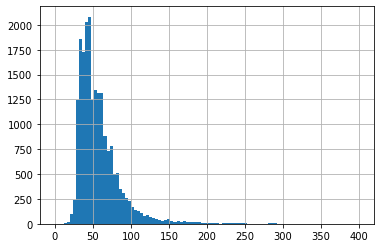

In [51]:
data['total_area'].hist(bins=100, range=(0,400))

In [52]:
data['total_area'].describe()

count    20518.000000
mean        58.870830
std         34.077046
min         12.000000
25%         39.500000
50%         50.900000
75%         67.900000
max        900.000000
Name: total_area, dtype: float64

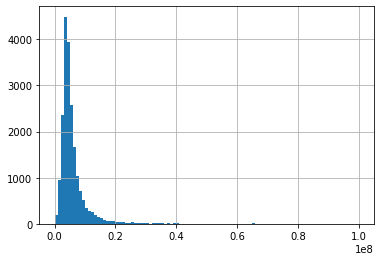

In [53]:
data['last_price'].hist(bins=100, range=(0,1e8))

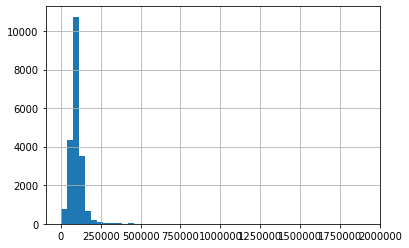

In [54]:
data['meter_cost'].hist(bins=50)

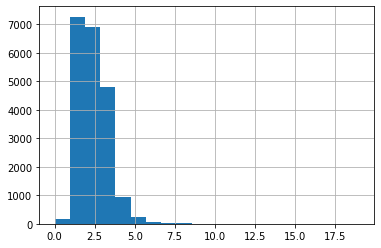

In [55]:
data['rooms'].hist(bins=20, range =(0,19))

Выявили ошибку в данных, есть квартиры с нулем комнат. Заменим их на 1.
Отбросим очень редкие случае и построим гистограмму в диапазоне от 1 до 5 комнат.

In [56]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

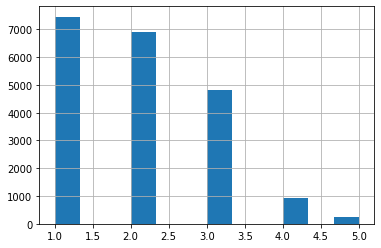

In [57]:
data['rooms'].hist(bins=12, range =(1,5))

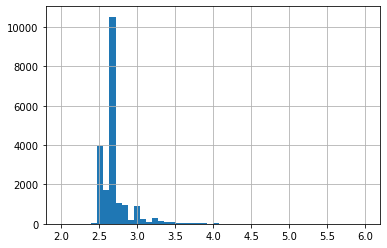

In [58]:
data['ceiling_height'].hist(bins=50, range=(2,6))

#### Вывод
Как видно по гистограммам, распределение площади, цены, числа комнат и высоты потолков идет по пуассоновскому распределению. 

<a id='Part_4_step_4.2'></a>
### 4.2 Время продажи квартиры

Построим гистрограмму по столбцу days_exposition и выведем среднее и медианное значение времени продажи.

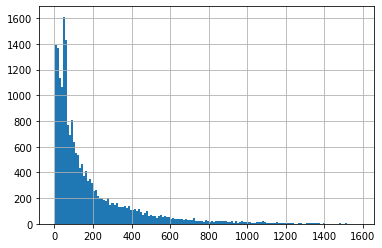

In [59]:
data['days_exposition'].hist(bins=150)

In [60]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [61]:
data['last_price'].describe()

count    2.051800e+04
mean     6.266173e+06
std      1.086298e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

#### Вывод
Данные по времени продажи квартиры имеют пуассовское распределение.  Минимальное время продажи составляет 1 день, а максимальное 1580 дней. Среднее значение продажи составляет 180 дней, а медианное 95. Можно считать, что квартира продалась достаточно быстро если время продажи составило менее 45 дней и квартира продавалась необычно долго если время продажи составило более 232 дня. 

<a id='Part_4_step_4.3'></a>
### 4.3 Корректировка данных
На основе полученных выше гистограмм уберем по 99% квантилю редкие значения по total_area, meter_cost, days_exposition

In [62]:
data['total_area'].quantile(0.99)

190.0

In [63]:
data['meter_cost'].quantile(0.99)

253030.71999999852

In [64]:
data['days_exposition'].quantile(0.99)

1068.6599999999962

In [65]:
good_data = data.query('days_exposition <= 1070')
good_data = good_data.query('total_area <= 200')
good_data =good_data.query('meter_cost <= 267000')
good_data = good_data.query('rooms <= 5')

In [66]:
len(good_data) / len(data)

0.9726581538161614

#### Вывод
Скорректировали данные, убрали редкие значения по дням продажи, площади и количеству комнат. В результате выборка уменьшилась на 13%.

<a id='Part_4_step_4.4.1'></a>
### 4.4 Факторы влияющеи на стоимость квартиры
### 4.4.1 Зависимость цены квадратного метра от площади

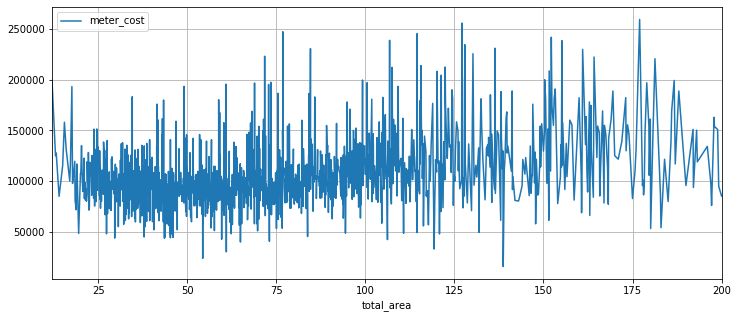

In [67]:
good_data.pivot_table(index='total_area',values='meter_cost').plot(grid=True, figsize=(12,5))

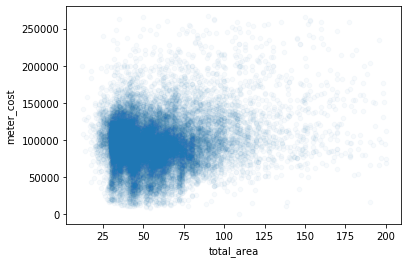

In [68]:
good_data.plot(x='total_area', y='meter_cost', kind='scatter', alpha=0.03)

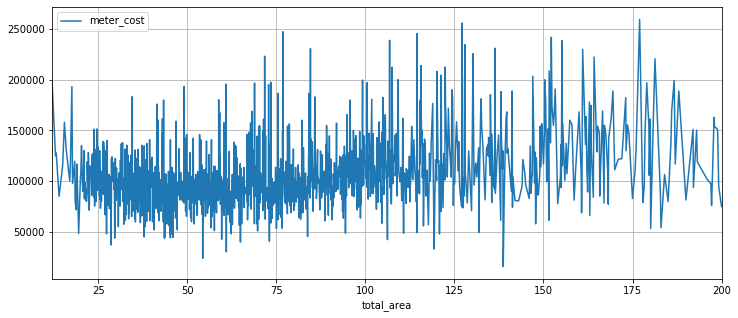

In [69]:
good_data.pivot_table(index='total_area',values='meter_cost',aggfunc='median').plot(grid=True, figsize=(12,5))

#### Вывод
В процессе анализа цены квадратного метра от площади была выявлена нечеткая корреляция цены от площади, причем разброс цен при площади больше 100 м2 становится значительным.
<a id='Part_4_step_4.4.2'></a>
### 4.4.2 Зависимость цены квартиры от количества комнат

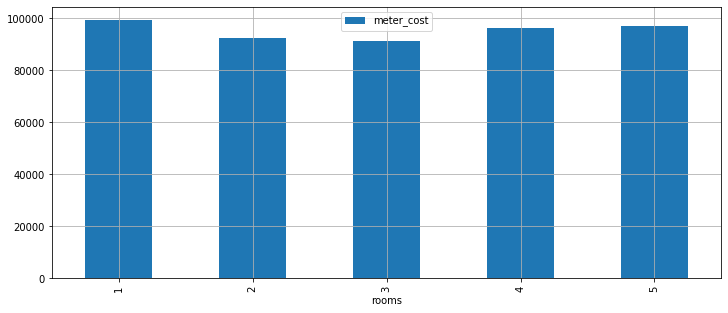

In [70]:
good_data.pivot_table(index='rooms',values='meter_cost').plot(grid=True, kind='bar',figsize=(12,5))

Цена квадратного метра квартиры не зависит от количества комнат. Проверим зависит ли цена квартира от количества комнат.

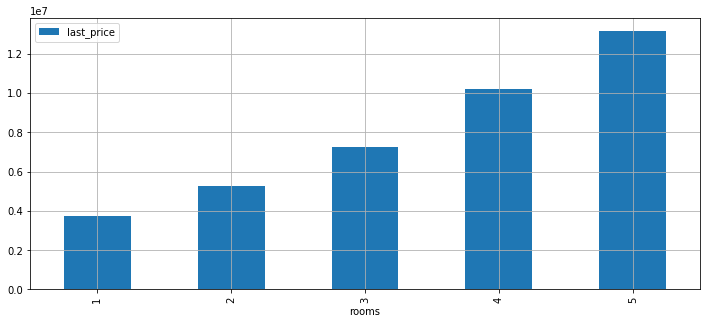

In [71]:
good_data.pivot_table(index='rooms',values='last_price').plot(grid=True, kind='bar',figsize=(12,5))

#### Вывод
Выявили прямую корреляцию цены квартиры от количество комнат, очевидно это связано с взаимосвязью площади квартиры и количества комнат в ней.
<a id='Part_4_step_4.4.3'></a>
### 4.4.3 Зависимость цены квартиры от удаленности от центра

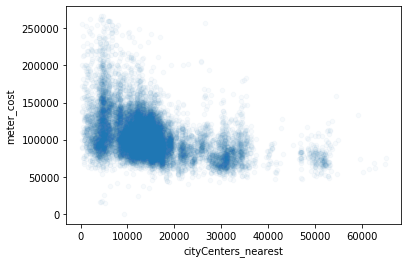

In [72]:
good_data.plot(x='cityCenters_nearest', y='meter_cost', kind='scatter', alpha=0.03)

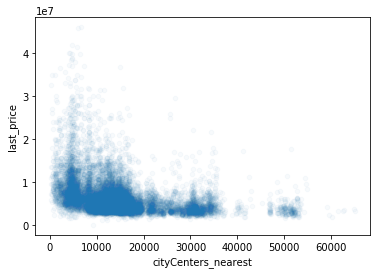

In [73]:
good_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.03)

#### Вывод
Выявили обратную корреляцию цены квартиры от удаленности от центра. На графике зависимости цены от расстояния до центра можно заметить 4 основных района по количеству предложений, однако при этом присутствуют значительные выбросы от средних значений.
<a id='Part_4_step_4.4.4'></a>
### 4.4.4 Зависимость цены квартиры от этажа
Посмотрим на зависимость цены квартиры в зависимости от этажа.

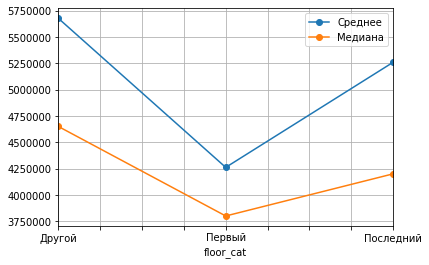

In [74]:
floor_price = good_data.pivot_table(index='floor_cat',values='last_price',aggfunc=['mean','median'])
floor_price.columns = ['Среднее','Медиана']
floor_price.plot(style='o-', grid=True)

#### Вывод
Цена квартиры зависит от этажа, первый этаж оказывается дешевле, чем последний или любой другой.
<a id='Part_4_step_4.4.5'></a>
### 4.4.5 Зависимость цены квартиры от дня недели, месяца или года публикации объявления
Посмотрим на цену квартиры в зависимости от дня недели, месяца и года публикации обьявления.

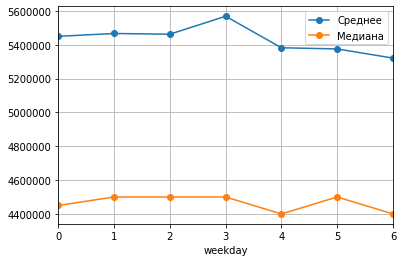

In [75]:
weekday_price = good_data.pivot_table(index='weekday',values='last_price',aggfunc=['mean','median'])
weekday_price.columns = ['Среднее','Медиана']
weekday_price.plot(style='o-', grid=True)

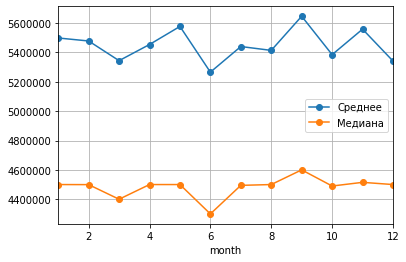

In [76]:
month_price = good_data.pivot_table(index='month',values='last_price',aggfunc=['mean','median'])
month_price.columns = ['Среднее','Медиана']
month_price.plot(style='o-', grid=True)

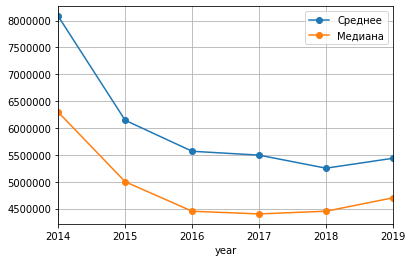

In [77]:
year_price = good_data.pivot_table(index='year',values='last_price',aggfunc=['mean','median'])
year_price.columns = ['Среднее','Медиана']
year_price.plot(style='o-', grid=True)

#### Вывод
Цена квартиры зависит от дня недели публикации, так в пятницу и воскресенье медианная цена оказывается ниже.
Цена квартиры зависит от месяца публикации, так летом, медианная цена оказывается ниже среднего годовой.
Цена квартиры зависит от года публикации, так цены раньше были выше.
<a id='Part_4_step_4.4.6'></a>
### 4.4.6 Исследование цены квадратного метра
Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [78]:
lists = good_data['locality_name'].value_counts()[:10]
lists

Санкт-Петербург      13137
посёлок Мурино         515
посёлок Шушары         407
Всеволожск             336
Колпино                305
посёлок Парголово      300
Пушкин                 299
деревня Кудрово        297
Гатчина                268
Выборг                 208
Name: locality_name, dtype: int64

In [79]:
good_data.query('locality_name in @lists.index').pivot_table(index='locality_name', values='meter_cost',aggfunc='mean').sort_values(by='meter_cost', ascending=False)

,meter_cost
locality_name,
Санкт-Петербург,108230.547537
Пушкин,102131.645485
деревня Кудрово,92419.986532
посёлок Парголово,89590.960000
посёлок Мурино,85880.926214
посёлок Шушары,77963.122850
Колпино,74700.311475
Гатчина,67927.873134
Всеволожск,66891.458333


#### Вывод
В результате анализа 10 городов с самым большим количеством объявлений было выяснено, что самая дорогая цена за квадратный метр в городе Санкт-Петербург, а самая дешевая в Выборге.

<a id='Part_4_step_4.4.7'></a>
### 4.4.7 Нахождение центральной части города
Выделим квартиры в Санкт-Петербурге ('locality_name'). Выясним, какая область входит в центр, для этого создадим столбец с расстоянием до центра в километрах. После этого посчитаем среднюю цену для каждого километра. Построим график и определим границу, где график сильно меняется — это и будет центральная зона.

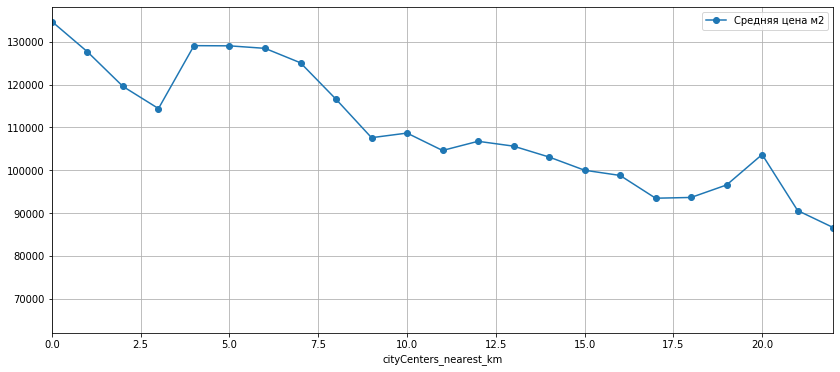

In [80]:
sp_data = good_data.query('locality_name == "Санкт-Петербург"')
nan_list = sp_data['cityCenters_nearest'].isnull()
sp_data = sp_data.query('@nan_list == False')
sp_data.loc[:,'cityCenters_nearest_km'] = (sp_data['cityCenters_nearest'] / 1000)
sp_data['cityCenters_nearest_km'] = sp_data['cityCenters_nearest_km'].astype('int')
find_center = sp_data.pivot_table(index='cityCenters_nearest_km',values='meter_cost', aggfunc='mean')
find_center.columns = ['Средняя цена м2']
find_center.plot(style='o-', grid=True, xlim = (0,22), figsize=(14,6))

В результате анализа и построения графика распределения цены квадратного метра от расстояния до центра, можно сделать вывод, что центральная часть города находиться в радиусе 8 км.

<a id='Part_4_step_4.5'></a>
### 4.5 Анализ  квартир в центре
Проанализируем центральную территорию города и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Для этого построим матрицу этих параметров.
Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc384018450>,
      dtype=object)

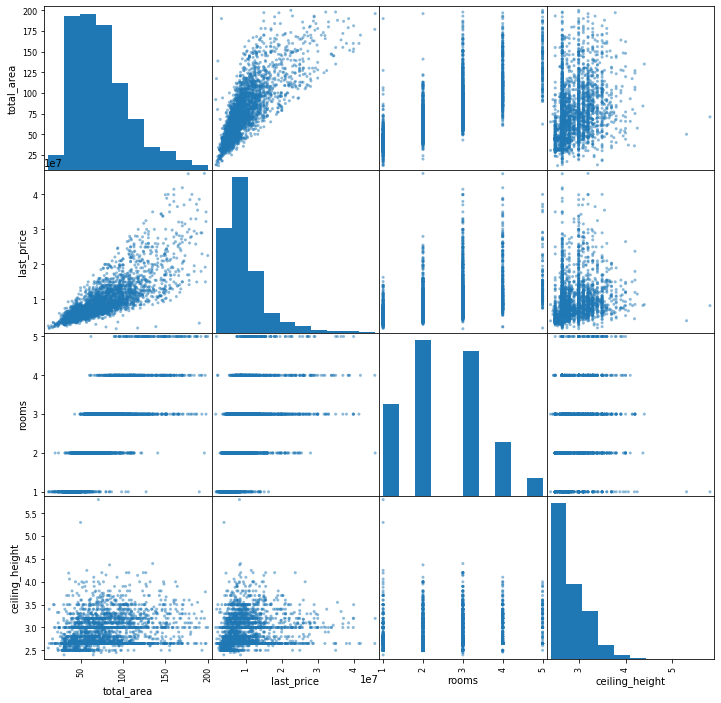

In [81]:
center_data = sp_data.query('cityCenters_nearest_km <= 8')[['total_area','last_price','rooms','ceiling_height','meter_cost','cityCenters_nearest','floor_cat','weekday','month','year']]

pd.plotting.scatter_matrix(center_data[['total_area','last_price','rooms','ceiling_height']], figsize=(12, 12))

#### Вывод
В результате построения диагональной диаграммы видно, что распределения площади, цены, количества комнат и высоты имеет пуассовское представление. Отношение цены квартиры к площади имеет прямую корреляцию. Зависимость цены квартиры от этажа имеет прямую корреляцию. Цена же квартриы высоты потолков не имеет четкой корреляции.
<a id='Part_4_step_4.5.1'></a>
### 4.5.1 Зависимость цены квартиры в центре от количества комнат

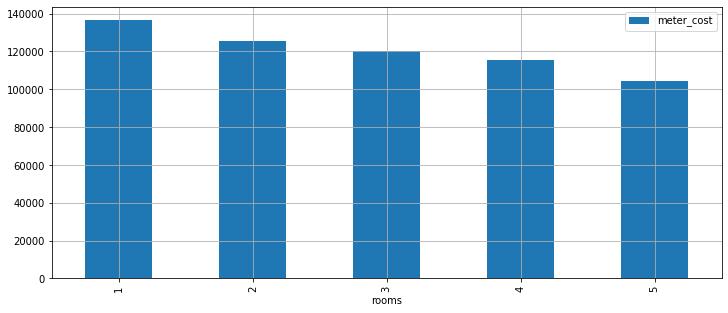

In [82]:
center_data.pivot_table(index='rooms',values='meter_cost').plot(grid=True, kind='bar',figsize=(12,5))

Цена квадратного метра квартиры в центре зависит от количества комнат и имеет обратную корреляцию. Проверим зависит ли цена квартира от количества комнат.

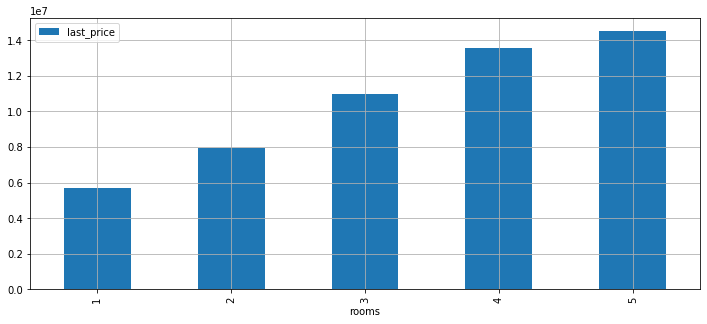

In [83]:
center_data.pivot_table(index='rooms',values='last_price').plot(grid=True, kind='bar',figsize=(12,5))

#### Вывод
Выявили прямую корреляцию цены квартиры от количество комнат, очевидно это связано с взаимосвязью площади квартиры и количества комнат в ней.
<a id='Part_4_step_4.5.2'></a>
### 4.5.2 Зависимость цены квартиры в центре от удаленности 

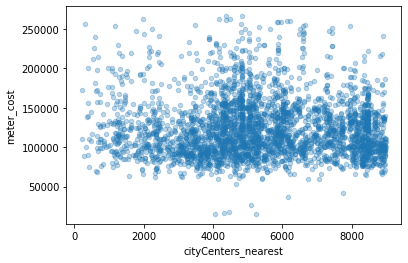

In [84]:
center_data.plot(x='cityCenters_nearest', y='meter_cost', kind='scatter', alpha=0.3)

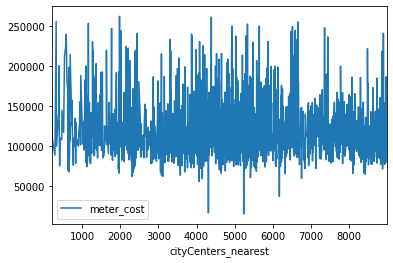

In [85]:
center_data.pivot_table(index='cityCenters_nearest',values='meter_cost',aggfunc='median').plot()

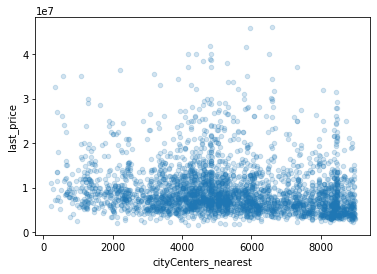

In [86]:
center_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.2)

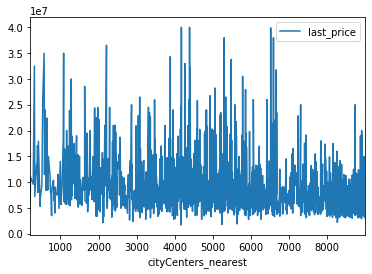

In [87]:
center_data.pivot_table(index='cityCenters_nearest',values='last_price',aggfunc='median').plot()

#### Вывод
Цена квадратного метра в центре не имеет выраженной корреляции, т.е. приблизительно одинакова для всего центра и составляет 125 т.р. Выявили небольшую обратную корреляцию цены квартиры от удаленности от центра. Причем можно выделить расстояния где цена за квадратный метр имеет сильный разброс.
<a id='Part_4_step_4.5.3'></a>
### 4.5.3 Зависимость цены квартиры в центре от этажа

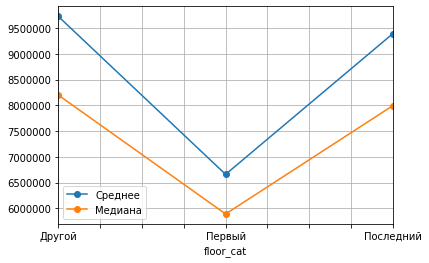

In [88]:
floor_price = center_data.pivot_table(index='floor_cat',values='last_price',aggfunc=['mean','median'])
floor_price.columns = ['Среднее','Медиана']
floor_price.plot(style='o-', grid=True)

#### Вывод
Цена квартиры зависит от этажа, первый этаж оказывается дешевле, чем последний или любой другой.
<a id='Part_4_step_4.5.4'></a>
### 4.5.4 Зависимость цены квартиры в центре от дня недели, месяца или года публикации объявления
Посмотрим на цену квартиры в центре в зависимости от дня недели, месяца и года публикации обьявления.

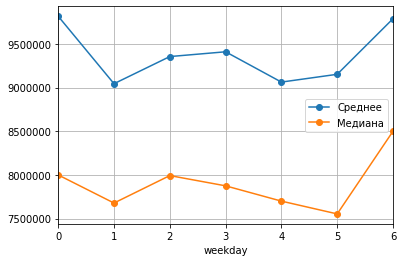

In [89]:
weekday_price = center_data.pivot_table(index='weekday',values='last_price',aggfunc=['mean','median'])
weekday_price.columns = ['Среднее','Медиана']
weekday_price.plot(style='o-', grid=True)

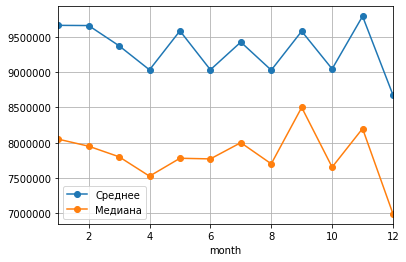

In [90]:
month_price = center_data.pivot_table(index='month',values='last_price',aggfunc=['mean','median'])
month_price.columns = ['Среднее','Медиана']
month_price.plot(style='o-', grid=True)

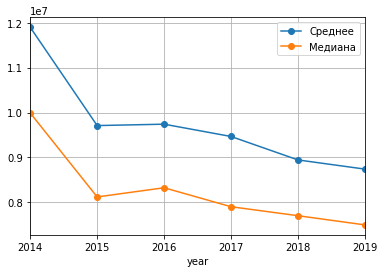

In [91]:
year_price = center_data.pivot_table(index='year',values='last_price',aggfunc=['mean','median'])
year_price.columns = ['Среднее','Медиана']
year_price.plot(style='o-', grid=True)

#### Вывод
Цена квартиры в центре зависит от дня недели публикации, так в вторник, пятницу и субботу медианная цена оказывается ниже, а максимальная цена выпадает на воскресенье.
Цена квартиры в центре зависит от месяца публикации, так медианная цена во второй половине года становится выше средней годовой, причем декабрь имеет самую низкую цену.
Цена квартиры в центре зависит от года публикации, так цены раньше были выше.


<a id='Part_final'></a>
###  5. Общий вывод

В ходе исследования объявлений о продаже квартир было выяснено, что на цену квартиры влияют множество факторов. Такие факторы как удаленность от центра, количество комнат и этаж сильно влияют на стоимость квартиры. Также было выяснено, что в зависимости от дня недели, месяца и года публикации объявления о продаже, цена может быть ниже или выше, так в среду и пятницу или летом квартиры оцениваются дешевле. Наблюдается тенденция удешевления жилья из года в год. Цены зависят от расположения квартиры, так самая дорогая стоимость квадратного метра в городе Санкт-Петербург и составляет 106 т.р., причем в г. Выборг цена оказывается в два раза меньше 57 т.р. Был выявлен центр города радиусом в 8 км. Цена квартиры в центре напрямую коррелируют с общей площадью жилья и количеством комнат в нем, причем высота потолка не влияет на цену явно. Объявления о продаже квартир в центре размещенные в воскресенье оказывались самыми дорогими, хотя в последний месяц года наблюдается резкий сброс цен на жилье. 